# Seaborn ile Covid-19 Analizi 1 : 
## Onaylanmış hasta sayısına göre eyalet/şehir 'lerin sıralanması

## Covid-19
Yeni Koronavirüs Hastalığı (COVID-19), ilk olarak Çin’in Vuhan Eyaleti’nde Aralık ayının sonlarında solunum yolu belirtileri (ateş, öksürük, nefes darlığı) gelişen bir grup hastada yapılan araştırmalar sonucunda 13 Ocak 2020’de tanımlanan bir virüstür.

Salgın başlangıçta bu bölgedeki deniz ürünleri ve hayvan pazarında bulunanlarda tespit edilmiştir. Daha sonra insandan insana bulaşarak Vuhan başta olmak üzere Hubei eyaletindeki diğer şehirlere ve Çin Halk Cumhuriyeti’nin diğer eyaletlerine ve diğer dünya ülkelerine yayılmıştır.

Koronavirüsler, hayvanlarda veya insanlarda hastalığa neden olabilecek büyük bir virüs ailesidir. İnsanlarda, birkaç koronavirüsün soğuk algınlığından Orta Doğu Solunum Sendromu (MERS) ve Şiddetli Akut Solunum Sendromu (SARS) gibi daha şiddetli hastalıklara kadar solunum yolu enfeksiyonlarına neden olduğu bilinmektedir. Yeni Koronavirüs Hastalığına SAR-CoV-2 virüsü neden olur.

https://covid19bilgi.saglik.gov.tr/tr/covid-19-yeni-koronavirus-hastaligi-nedir

## Seaborn

Seaborn, matplotlib tabanlı bir Python veri görselleştirme kütüphanesidir . Çekici ve bilgilendirici istatistiksel grafikler çizmek için üst düzey bir arayüz sağlar.

https://seaborn.pydata.org/

### Kütüphaneler

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv


### Kaggle'de bulunan veri setinin aktif edilmesi


In [2]:
covid_19 = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")

### İlk incelemleler

In [3]:
# ObservationDate : Gözlem Tarihi
# Province/State : İl / Eyalet
# Country/Region : Ülke / Bölge
# Last Update : Son Güncelleme tarihi
# Confirmed : Onaylanmış kişi sayısı
# Deaths : Ölümler
# Recovered : Kurtarılan

covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### İşlem yapabilmemizi için engel olucak sütunların isimlendirilmesini değiştirdik:


In [4]:
covid_19_columns_v2 = ['sNo','ObservationDate','Province_State','Country_Region','Last Update',"Confirmed","Deaths","Recovered"]
covid_19.columns = covid_19_columns_v2
covid_19.head()

,sNo,ObservationDate,Province_State,Country_Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
covid_19.info() # Değiştirilmiş mi?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25582 entries, 0 to 25581
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sNo              25582 non-null  int64  
 1   ObservationDate  25582 non-null  object 
 2   Province_State   12294 non-null  object 
 3   Country_Region   25582 non-null  object 
 4   Last Update      25582 non-null  object 
 5   Confirmed        25582 non-null  float64
 6   Deaths           25582 non-null  float64
 7   Recovered        25582 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.6+ MB


### "Seaborn ile Covid-19 Analizi 1" için gerekli 2 sütunumuzu("Province_State","Confirmed") seaborn_data_1 verisinde birleştirmiş olalım.


In [6]:
seaborn_data_1 = pd.DataFrame({"Province_State": covid_19.Province_State,"Confirmed" : covid_19.Confirmed})
# seaborn_data_1 # Değerleri Görebilirsiniz?

### Eyalet/Şehirlerimizi benzersiz şekilde listelemeliyiz


In [7]:
Province_State_u = list(covid_19["Province_State"].unique())
# Province_State_u # Değerleri görebilirsiniz.

### Yeni bir dataframe oluşturalım : ( Eyalet/Şehirlerin benzersiz değerleri barındıran sütun ile boş değerlere sahip Hastalık sayısı veri sütunu oluşturalım)


In [8]:

seaborn_data = pd.DataFrame({"Province_State": Province_State_u,"Confirmed" : ""})

seaborn_data

,Province_State,Confirmed
0,Anhui,
1,Beijing,
2,Chongqing,
3,Fujian,
4,Gansu,
...,...,...
350,Toscana,
351,Umbria,
352,Unknown,
353,Valle d'Aosta,


### ÖNEMLİ KISIM: Boş Confirmed değerlerini, eyalet/şehirlerindeki teşhis sayısı toplam değerleri ile doldurmak:

In [9]:
j = 0

for i in Province_State_u: # Benzersiz eyalet/şehir verimizde dolaşalım.
    
    x = seaborn_data_1[seaborn_data_1['Province_State']==i] # Benzersiz değerimiz , içinde çok sayıda aynı eyalet/şehir'i barındıran liste içinde eşleştiğinde, x değişkenine değeri ata.
    
    # İçi boş Confirmed değerlerine sahip, seaborn_data veri setimizin, j indeksindekin Confirmed sütununa,
    # for döngüsüyle gezdiğimiz sıradaki eyalet/şehir'e ait onaylanmış tanı sayısını basalım.
    seaborn_data.iloc[j,seaborn_data.columns.get_loc("Confirmed")] = sum(x.Confirmed)
    
    j+=1 # indeks değerimiz döngü boyunca 1 artsın. (Confirmed sütununda gezinmek için)
     

In [10]:
seaborn_data # Confirmed değerleri dolu

,Province_State,Confirmed
0,Anhui,101145
1,Beijing,52727
2,Chongqing,59920
3,Fujian,33846
4,Gansu,12759
...,...,...
350,Toscana,29655
351,Umbria,4264
352,Unknown,4290
353,Valle d'Aosta,3511


### Görselleştirme kısmımız

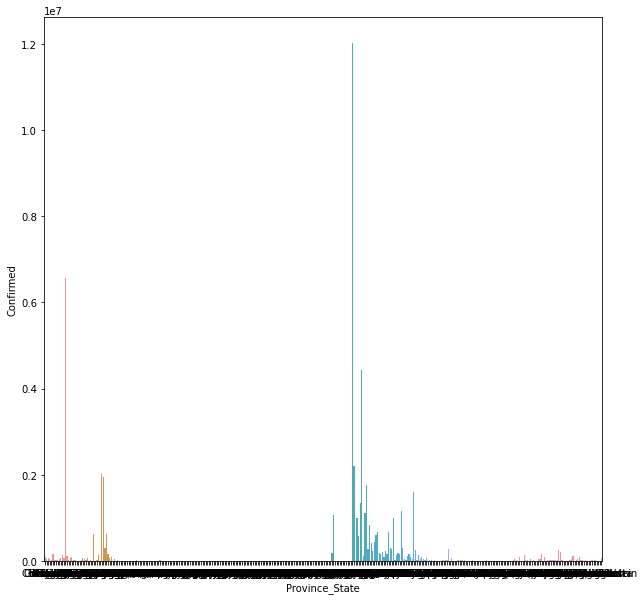

In [11]:
plt.figure(figsize=(10,10)) # Matplotlib sayesinde figür oluşturuyoruz.


# x: Eyalet/Şehirler
# y: Onaylanmış hasta sayısı
sns.barplot(x=seaborn_data['Province_State'], y=seaborn_data['Confirmed']) # sns kütüphanesi ile barplot oluşturuyoruz
plt.show()

# Farkettiğimiz gibi görselleştirme pek verimli olmadı. Gelin tüm değerleri değil sadece ilk 15 değerimizi görselleştirerlim:

###  Görselleştirme kısmı 2

### Verimizi Hasta sayısının fazla olduğu değerden başlıyarak sıralayalım (Sort)


In [12]:
new_index = (seaborn_data["Confirmed"].sort_values(ascending=False)).index.values

# Sort edilmiş yeni datamızı oluşturalım
sorted_data = seaborn_data.reindex(new_index)
sorted_data

,Province_State,Confirmed
196,New York,1.20165e+07
13,Hubei,6.56602e+06
202,New Jersey,4.44187e+06
197,Massachusetts,2.21288e+06
37,Illinois,2.02252e+06
...,...,...
155,"Montgomery County, TX",0
289,Recovered,0
285,Jervis Bay Territory,0
284,External territories,0


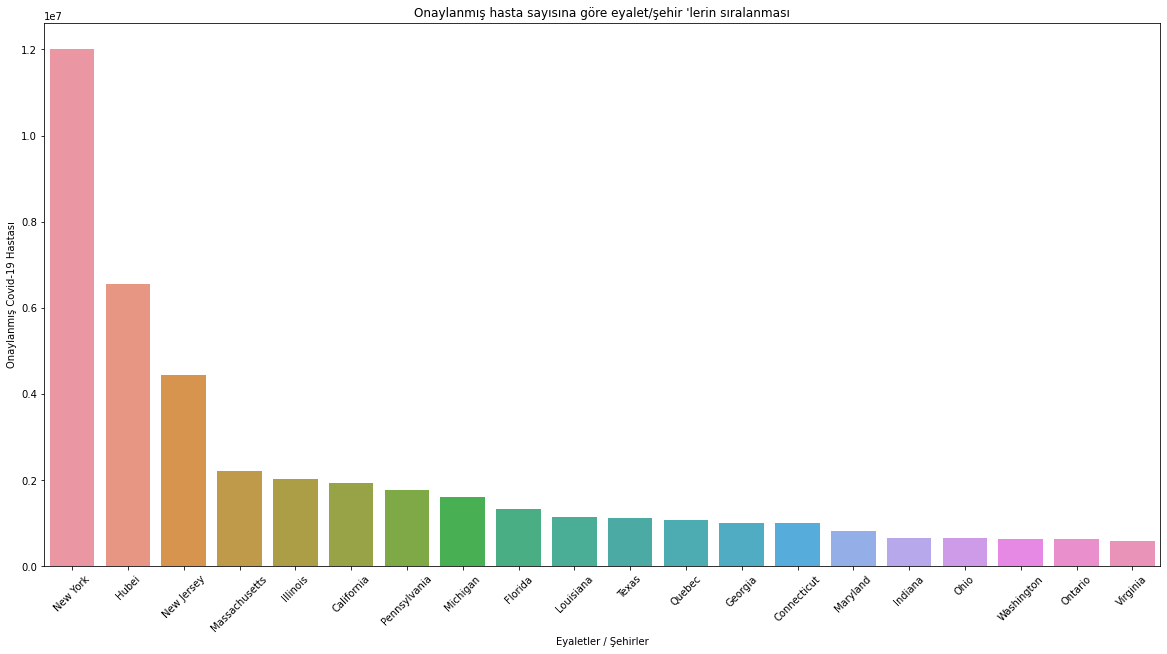

In [13]:
plt.figure(figsize=(20,10)) 

# sns kütüphanesinden bir barplot oluştur 
sns.barplot(x=sorted_data['Province_State'][:20], y=sorted_data['Confirmed'][:20])

# Görsellik için yazılarımız
plt.xticks(rotation= 45)
plt.xlabel('Eyaletler / Şehirler')
plt.ylabel('Onaylanmış Covid-19 Hastası')
plt.title("Onaylanmış hasta sayısına göre eyalet/şehir 'lerin sıralanması")
plt.show()

###  Sonuç:

"Covid_19 - Seaborn Analiz 1: Onaylanmış hasta sayısına göre eyalet/şehir 'lerin sıralanması" adlı görselleştirme çalışmamız ile Covid_19 salgınının gözlendiği en yüksek 20 eyalet/şehir'i Seaborn ile sıralayıp, görselleştirmiş olduk.

"Covid_19 -Seaborn Analiz 2'de" görüşmek üzere...